# Neural Networks Hands-on



We load the tensorflow library, that allows us to train neural networks.

Further we load the numpy library, the pickle library to load and save data and functions from the matplotlib library to plot certain aspects of neural networks.

In [ ]:
import tensorflow as tf
import numpy as np
import pickle
from matplotlib import pyplot as plt
from matplotlib.figure import Figure

Here we have imported Tensorflow and the tensorflow datasets which includes the MINST dataset.

In [ ]:
mnist = tf.keras.datasets.mnist
new_size = (14,14)
(x_train, y_train), (x_test, y_test) = mnist.load_data()

x_train = tf.reshape(x_train, (60000,28,28,1))
x_test = tf.reshape(x_test, (10000,28,28,1))
x_train = tf.image.resize(x_train,new_size).numpy()
x_test = tf.image.resize(x_test,new_size).numpy()
x_train, x_test = x_train / 255.0, x_test / 255.0


11490434/11490434 [==============================] - 0s 0us/step


We imported the MINST data set, automatically splitting it into test and training set and further shuffing the data randomly.

In oder to build our neural network we need to create its architecture.
We load different layer libraries as well as optimizers.

In [ ]:
from tensorflow.keras.layers import Input, Dense, Flatten, Reshape
from tensorflow.keras.layers import Reshape, Dropout, Conv2D
from tensorflow.keras.layers import Concatenate, MaxPooling2D
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [ ]:
width = 14
height = 14

We discribe first the neural network architecture, from input to output

We further tell tensorflow about the loss function to use and the numerical algorithm ADAM, a special version of the gradient descent to opmtimize our network in adjusting its weights.

model_a and model_b are some helpers to investigate the interieur of our network.

In [ ]:
shape = (height,width,1)
input_img = Input(shape=shape)
encoded = Flatten()(input_img)
encoded_a = Dense(144, activation='relu')(encoded)
encoded = Dropout(0.1)(encoded_a)
encoded_b = Dense(64, activation='relu')(encoded)
encoded = Dropout(0.1)(encoded_b)
output = Dense(10)(encoded)

model = Model(input_img, output)

model_a = Model(input_img,encoded_a)
model_b = Model(input_img,encoded_b)

loss_fn = tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True)
model.compile(optimizer='adam',
              loss=loss_fn,
              metrics=['accuracy'])


We train the model with 15 epochs ( we show the model our training data 15 times )

In [ ]:
model.fit(x_train, y_train, epochs=15)


Epoch 1/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.3359 - accuracy: 0.9021
Epoch 2/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1460 - accuracy: 0.9559
Epoch 3/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.1108 - accuracy: 0.9659
Epoch 4/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0914 - accuracy: 0.9723
Epoch 5/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0785 - accuracy: 0.9753
Epoch 6/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0690 - accuracy: 0.9778
Epoch 7/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.0627 - accuracy: 0.9799
Epoch 8/15
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0559 - accuracy: 0.9823
Epoch 9/15
1875/1875 [==============================] - 3s 2ms/step - loss: 0.0512 - accuracy: 0.9833
Epoch 10/15
1875/1875 [==============================] - 2s 1ms/step - loss: 0.050

We define a function that allows us with together with the helper models "model_a and model_b" as well as "model" to plot the different layers of the model.

In [ ]:
def plot_model(data):
  f, axarr = plt.subplots(4)
  axarr[0].imshow(data)
  axarr[1].imshow(model_a(data.reshape(1,14,14)).numpy().reshape(12,12))
  axarr[2].imshow(model_b(data.reshape(1,14,14)).numpy().reshape(8,8))
  axarr[3].imshow(model(data.reshape(1,14,14)).numpy())


We further define some functions to save the state of the different layers, so that we can external programs access this data.

In [ ]:
def renormalize(a):
  max_a = np.max(a)
  min_a = np.min(a)
  a = (a - min_a)/(max_a-min_a)
  return(a)
def save_model(data, filename):
  l = []
  n_layers = 4
  l.append(n_layers)
  l.append(np.array(data))
  l.append(renormalize(model_a(data.reshape(1,14,14)).numpy().reshape(12,12)))
  l.append(renormalize(model_b(data.reshape(1,14,14)).numpy().reshape(8,8)))
  l.append(renormalize(model(data.reshape(1,14,14)).numpy()))
  f = open(filename, "wb")
  pickle.dump(l, f)
  f.close()

We test our plotting system and investigate the 4 layers of the neural network.

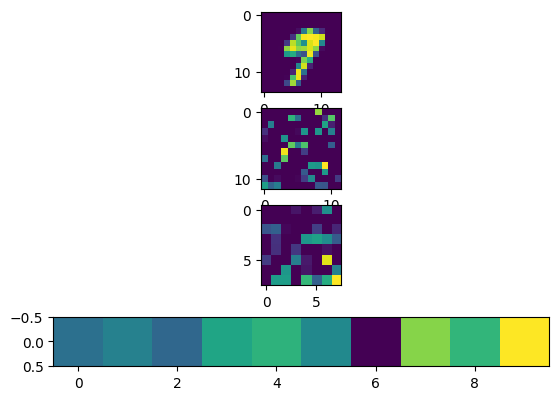

In [ ]:
plot_model(x_test[20])

We test our model saving machinism

In [ ]:
save_model(x_test[20],"x-test-20-9.pk")

We install the gradio user interface library in order to detect handdrawn numbers.

In [ ]:
!pip install gradio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 20.2/20.2 MB 97.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.3/66.3 kB 9.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 298.4/298.4 kB 34.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.7/75.7 kB 10.1 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 295.0/295.0 kB 32.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 138.7/138.7 kB 19.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.7/45.7 kB 6.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 59.5/59.5 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 129.9/129.9 kB 16.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.3/58.3 kB 7.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 67.0/67.0 kB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 76.0/76.0 kB 10.5 MB/s eta 

We define a function that connects our gradio input to the gradio output, and provides us with the prediction given by the neural network.

In [ ]:
def gradio_helper(img):
  img = np.array(img)
  img = img.reshape(1,28,28,1)
  img = img / 255.
  img = tf.image.resize(img,(14,14))
  x = model(img).numpy().reshape(10)
  x_min = min(x)
  x_max = max(x)
  x = x-x_min
  x = x/(x_max-x_min)

  labels = {"zero":float(x[0]),
            "one": float(x[1]),
            "two": float(x[2]),
            "three":float(x[3]),
            "four":float(x[4]),
            "five":float(x[5]),
            "six":float(x[6]),
            "seven":float(x[7]),
            "eight":float(x[8]),
            "nine":float(x[9])}
  return (labels)
  #text = "0: " +str(x[0])+ "\n1: "+str(x[1])+"\n2: "+str(x[2])+" 3: "+str(x[3])+" 4: "+str(x[4])+" 5: "+str(x[5])+ " 6: "+str(x[6])+" 7: "+str(x[7])+" 8: "+str(x[8])+" 9: "+str(x[9])
  #return (text)

We run the gradio interface and predict our handwritten numbers.

In [ ]:
import gradio

gradio.Interface(gradio_helper, "sketchpad", "label").launch(share=True,debug=True)

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
Running on public URL: https://2f6277788b3236bfdc.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from Terminal to deploy to Spaces (https://huggingface.co/spaces)


/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/gradio/components/button.py:89: UserWarning: Using the update method is deprecated. Simply return a new object instead, e.g. `return gr.Button(...)` instead of `return gr.Button.update(...)`.
  warnings.warn(
